In [1]:
import scipy.io
import numpy as np, h5py
import matplotlib.pyplot as plt
import copy
import pandas as pd
import pickle
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi']=150
rcParams['lines.linewidth']=1
rcParams['axes.grid']=True
rcParams['axes.facecolor']='#FFFFFF'
rcParams['font.size']=14
rcParams['patch.edgecolor']='none'

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
def readScan(scan):
    # We read the file saved in Matlab. There is only one variable in the file called scansMini
    data = h5py.File(scan, 'r')
    Xscans=data.get('scansMini')
    # We have to get the values into the right format (subjects, dim1, dim2, dim3, channels)
    X=copy.copy(Xscans.value)
    X=np.expand_dims(X,4)
    X1=np.rollaxis(X,3)
    return X1

In [5]:
def readLabels(labels):
    data = h5py.File(labels, 'r')
    Xscans=data.get('labels')
    X=copy.copy(Xscans.value)
    X2=np.squeeze(X).astype(int)
    return X2

In [6]:
y=readLabels('fold1/train/labelsTrain.mat')
X1=readScan('fold1/train/scansMiniTrain1.mat')
X2=readScan('fold1/train/scansMiniTrain2.mat')
X3=readScan('fold1/train/scansMiniTrain3.mat')
X4=readScan('fold1/train/scansMiniTrain4.mat')
X5=readScan('fold1/train/scansMiniTrain5.mat')
X6=readScan('fold1/train/scansMiniTrain6.mat')
X7=readScan('fold1/train/scansMiniTrain7.mat')
X8=readScan('fold1/train/scansMiniTrain8.mat')
X9=readScan('fold1/train/scansMiniTrain9.mat')
X10=readScan('fold1/train/scansMiniTrain10.mat')
X11=readScan('fold1/train/scansMiniTrain11.mat')
X12=readScan('fold1/train/scansMiniTrain12.mat')
X13=readScan('fold1/train/scansMiniTrain13.mat')
X14=readScan('fold1/train/scansMiniTrain14.mat')
X15=readScan('fold1/train/scansMiniTrain15.mat')
X16=readScan('fold1/train/scansMiniTrain16.mat')
X17=readScan('fold1/train/scansMiniTrain17.mat')

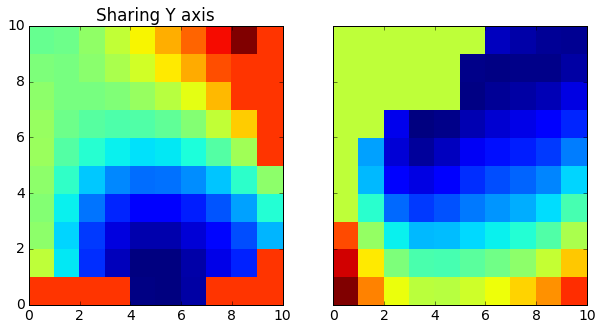

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pcolor((X1[10,:,:,0,0]))
ax1.set_title('Sharing Y axis')
ax2.pcolor((X2[10,:,:,0,0]))

In [8]:
X1.shape

(248, 10, 10, 10, 1)

---

## Keras libraries

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Merge
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D
from keras.layers.core import Dense, Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
import time

Using TensorFlow backend.


In [9]:
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
import math

---

## The model

In [10]:
adam=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-04)#

In [20]:
final_model.reset_states()
model1.reset_states()
model2.reset_states()
model3.reset_states()
model4.reset_states()
model5.reset_states()
model6.reset_states()
model7.reset_states()
model8.reset_states()
model9.reset_states()
model10.reset_states()
model11.reset_states()
model12.reset_states()
model13.reset_states()
model14.reset_states()
model15.reset_states()
model16.reset_states()
model17.reset_states()

In [12]:
from keras.layers.advanced_activations import ELU
# from keras.layers.advanced_activations import Layer

In [ ]:
# class ELU(Layer):
#     """Exponential Linear Unit.
#     It follows:
#     `f(x) =  alpha * (exp(x) - 1.) for x < 0`,
#     `f(x) = x for x >= 0`.
#     # Input shape
#         Arbitrary. Use the keyword argument `input_shape`
#         (tuple of integers, does not include the samples axis)
#         when using this layer as the first layer in a model.
#     # Output shape
#         Same shape as the input.
#     # Arguments
#         alpha: scale for the negative factor.
#     # References
#         - [Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)](https://arxiv.org/abs/1511.07289v1)
#     """

#     def __init__(self, alpha=1.0, **kwargs):
#         self.supports_masking = True
#         self.alpha = K.cast_to_floatx(alpha)
#         super(ELU, self).__init__(**kwargs)

#     def call(self, x, mask=None):
#         return K.elu(x, self.alpha)

#     def get_config(self):
#         config = {'alpha': float(self.alpha)}
#         base_config = super(ELU, self).get_config()
#         return dict(list(base_config.items()) + list(config.items()))

In [ ]:
# from keras.utils import np_utils

In [13]:
#ELU=keras.layers.advanced_activations.ELU

In [14]:
model1=Sequential()
model1.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal', W_regularizer=l2(.05)))
model1.add(BatchNormalization())
model1.add(ELU())
model1.add(Flatten())
model1.add(Dropout(0.2))
model1.add(Dense(20, init='glorot_normal'))
model1.add(ELU())

model2=Sequential()
model2.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid',  init='he_normal',W_regularizer=l2(.05)))
model2.add(BatchNormalization())
model2.add(ELU())
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(20, init='glorot_normal'))
model2.add(ELU())

model3=Sequential()
model3.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid',  init='he_normal',W_regularizer=l2(.05)))
model3.add(BatchNormalization())
model3.add(ELU())
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(20, init='glorot_normal'))
model3.add(ELU())

model4=Sequential()
model4.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid',  init='he_normal',W_regularizer=l2(.05)))
model4.add(BatchNormalization())
model4.add(ELU())
model4.add(Flatten())
model4.add(Dropout(0.2))
model4.add(Dense(20, init='glorot_normal'))
model4.add(ELU())

model5=Sequential()
model5.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model5.add(BatchNormalization())
model5.add(ELU())
model5.add(Flatten())
model5.add(Dropout(0.2))
model5.add(Dense(20, init='glorot_normal'))
model5.add(ELU())

model6=Sequential()
model6.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model6.add(BatchNormalization())
model6.add(ELU())
model6.add(Flatten())
model6.add(Dropout(0.2))
model6.add(Dense(20, init='glorot_normal'))
model6.add(ELU())

model7=Sequential()
model7.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid',  init='he_normal',W_regularizer=l2(.05)))
model7.add(BatchNormalization())
model7.add(ELU())
model7.add(Flatten())
model7.add(Dropout(0.2))
model7.add(Dense(20, init='glorot_normal'))
model7.add(ELU())

model8=Sequential()
model8.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model8.add(BatchNormalization())
model8.add(ELU())
model8.add(Flatten())
model8.add(Dropout(0.2))
model8.add(Dense(20, init='glorot_normal'))
model8.add(ELU())

model9=Sequential()
model9.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model9.add(BatchNormalization())
model9.add(ELU())
model9.add(Flatten())
model9.add(Dropout(0.2))
model9.add(Dense(20, init='glorot_normal'))
model9.add(ELU())

model10=Sequential()
model10.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model10.add(BatchNormalization())
model10.add(ELU())
model10.add(Flatten())
model10.add(Dropout(0.2))
model10.add(Dense(20, init='glorot_normal'))
model10.add(ELU())

model11=Sequential()
model11.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model11.add(BatchNormalization())
model11.add(ELU())
model11.add(Flatten())
model11.add(Dropout(0.2))
model11.add(Dense(20, init='glorot_normal'))
model11.add(ELU())

model12=Sequential()
model12.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model12.add(BatchNormalization())
model12.add(ELU())
model12.add(Flatten())
model12.add(Dropout(0.2))
model12.add(Dense(20, init='glorot_normal'))
model12.add(ELU())

model13=Sequential()
model13.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model13.add(BatchNormalization())
model13.add(ELU())
model13.add(Flatten())
model13.add(Dropout(0.2))
model13.add(Dense(20, init='glorot_normal'))
model13.add(ELU())

model14=Sequential()
model14.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model14.add(BatchNormalization())
model14.add(ELU())
model14.add(Flatten())
model14.add(Dropout(0.2))
model14.add(Dense(20, init='glorot_normal'))
model14.add(ELU())

model15=Sequential()
model15.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model15.add(BatchNormalization())
model15.add(ELU())
model15.add(Flatten())
model15.add(Dropout(0.2))
model15.add(Dense(20, init='glorot_normal'))
model15.add(ELU())

model16=Sequential()
model16.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model16.add(BatchNormalization())
model16.add(ELU())
model16.add(Flatten())
model16.add(Dropout(0.2))
model16.add(Dense(20, init='glorot_normal'))
model16.add(ELU())

model17=Sequential()
model17.add(Convolution3D(10, 3, 3, 3, input_shape=(10, 10, 10,1), border_mode='valid', init='he_normal',W_regularizer=l2(.05)))
model17.add(BatchNormalization())
model17.add(ELU())
model17.add(Flatten())
model17.add(Dropout(0.2))
model17.add(Dense(20, init='glorot_normal'))
model17.add(ELU())

merged = Merge([model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16, model17], mode='concat')
final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10, init='glorot_normal',W_regularizer=l2(.01)))
final_model.add(ELU())
final_model.add(Dense(1, init='glorot_normal'))
final_model.add(ELU())
final_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [15]:
import keras.backend as K
print K.get_value(final_model.optimizer.lr)

0.0005


In [16]:
# WATCHOUT: Change the name of the model
acc_train=[]
loss_train=[]
acc_val=[]
loss_val=[]
all_lr=[]
t0 = time.time()

# thresholds
thres1=.80
thres1passed=0
thres2=.90
thres2passed=0
thres3=.93
thres3passed=0
thres4=.96
thres4passed=0
maxAcc=0
maxAccVal=0
countNoIncrease=0

for iteration in np.linspace(1,70,70):
    history=final_model.fit([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X1, X12, X13, X14, X15, X16, X17], y, validation_split=0.2, nb_epoch=1, batch_size=8,verbose=2)
    # Append values
    acc_train.append(history.history['acc'])
    acc_val.append(history.history['val_acc'])
    loss_train.append(history.history['loss'])
    loss_val.append(history.history['val_loss'])
    all_lr.append(K.get_value(final_model.optimizer.lr))
    
    # Compare last iteration vs max value of Acc
    if acc_train[-1][0]>maxAcc:
        maxAcc=max(acc_train)[0]
        maxIt=iteration
    else:
        countNoIncrease=countNoIncrease+1
        
    if acc_val[-1][0]>maxAccVal:
        maxAccVal=max(acc_val)[0]
        final_model.save('m720s10_iter_'+'{0}_valAcc_{1}'.format(int(iteration),acc_val[-1][0])+'.h5')
        #final_model.save('m720s10_iter_FILLMANUAL.h5')
    
    if countNoIncrease>=10:
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres1 and thres1passed == 0:
        thres1passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres2 and thres2passed == 0:
        thres2passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres3 and thres3passed == 0:
        thres3passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres4 and thres4passed == 0:
        thres4passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))   
    
t1 = time.time()
print (t1-t0)/60/60

Train on 198 samples, validate on 50 samples
Epoch 1/1
119s - loss: 9.4521 - acc: 0.0657 - val_loss: 1.2913 - val_acc: 0.1000
Train on 198 samples, validate on 50 samples
Epoch 1/1
116s - loss: 9.1244 - acc: 0.0253 - val_loss: 0.9934 - val_acc: 0.0800
Train on 198 samples, validate on 50 samples
Epoch 1/1
116s - loss: 9.3163 - acc: 0.0202 - val_loss: 2.3559 - val_acc: 0.1600
Train on 198 samples, validate on 50 samples
Epoch 1/1
174s - loss: 9.5871 - acc: 0.0051 - val_loss: 3.2987 - val_acc: 0.1800
Train on 198 samples, validate on 50 samples
Epoch 1/1
122s - loss: 9.1364 - acc: 0.0051 - val_loss: 1.6608 - val_acc: 0.0600
Train on 198 samples, validate on 50 samples
Epoch 1/1
114s - loss: 9.5051 - acc: 0.0051 - val_loss: 1.6868 - val_acc: 0.0200
Train on 198 samples, validate on 50 samples
Epoch 1/1
176s - loss: 9.1609 - acc: 0.0202 - val_loss: 1.6255 - val_acc: 0.0400
Train on 198 samples, validate on 50 samples
Epoch 1/1
133s - loss: 8.3276 - acc: 0.0152 - val_loss: 2.3000 - val_acc:

KeyboardInterrupt: 

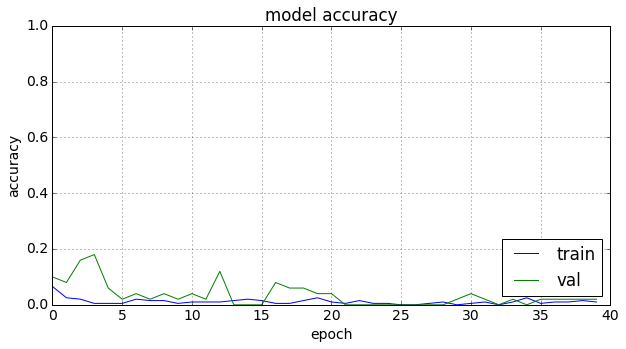

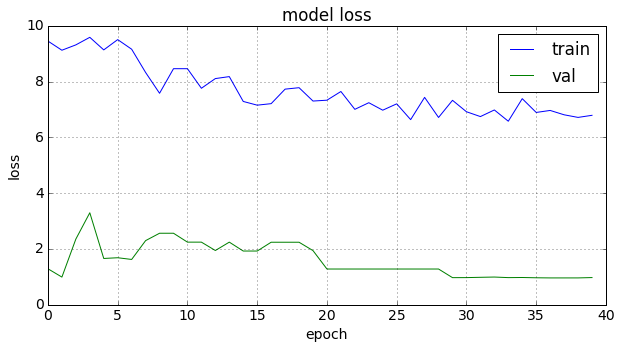

In [17]:
#summarize history for accuracy
fig=plt.figure()
plt.plot(acc_train)
plt.plot(acc_val)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='lower right')
plt.ylim([0, 1])
plt.show()
# summarize history for accuracy
plt.plot(loss_train)
plt.plot(loss_val)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
#plt.ylim([0, 2])
plt.show()

In [ ]:
fig=plt.figure()
plt.plot(all_lr)
plt.title('learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.legend(['learning rate'], loc='upper right')
plt.show()

---

## To resume training

In [ ]:
t0 = time.time()

for iteration in np.linspace(3,8,6):
    history=final_model.fit([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X1, X12, X13, X14, X15, X16, X17], y, validation_split=0.2, nb_epoch=1, batch_size=8,verbose=2)
    # Append values
    acc_train.append(history.history['acc'])
    acc_val.append(history.history['val_acc'])
    loss_train.append(history.history['loss'])
    loss_val.append(history.history['val_loss'])
    all_lr.append(K.get_value(final_model.optimizer.lr))
    
    # Compare last iteration vs max value of Acc
    if acc_train[-1][0]>maxAcc:
        maxAcc=max(acc_train)[0]
        maxIt=iteration
    else:
        countNoIncrease=countNoIncrease+1
        
    if acc_val[-1][0]>maxAccVal:
        maxAccVal=max(acc_val)[0]
        final_model.save('m715s10_iter_'+'{0}_valAcc_{1}'.format(int(iteration),acc_val[-1][0])+'.h5')
    
    if countNoIncrease>=10:
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres1 and thres1passed == 0:
        thres1passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres2 and thres2passed == 0:
        thres2passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres3 and thres3passed == 0:
        thres3passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))    
        
    if acc_train[-1][0] > thres4 and thres4passed == 0:
        thres4passed=1
        countNoIncrease=0
        K.set_value(final_model.optimizer.lr, 0.5 * K.get_value(final_model.optimizer.lr))   
    
t1 = time.time()
print (t1-t0)/60/60

---

## To Save the model and the variables

In [ ]:
final_model.save('X.h5')

In [ ]:
K_LR=K.get_value(adam.lr)
K_LR, acc_train, loss_train, acc_val, loss_val, all_lr, countNoIncrease, maxAcc, maxAccVal, thres1, thres1passed, thres2, thres2passed, thres3, thres3passed, thres4, thres4passed
with open('Xobjs.pickle', 'wb') as f:
    pickle.dump([K_LR, acc_train, loss_train, acc_val, loss_val, all_lr, countNoIncrease, maxAcc, maxAccVal, thres1, thres1passed, thres2, thres2passed, thres3, thres3passed, thres4, thres4passed], f)

---

## To retreive the model and the variables

In [ ]:
# Getting back the objects:
with open('m715objs.pickle') as f:
    K_LR, acc_train, loss_train, acc_val, loss_val, all_lr, countNoIncrease, maxAcc, maxAccVal, thres1, thres1passed, thres2, thres2passed, thres3, thres3passed, thres4, thres4passed = pickle.load(f)

In [ ]:
from keras.models import load_model
best_model=load_model('m715s10_iter_4_valAcc_0.96.h5')

In [ ]:
y_pred=best_model.predict_classes([X1test, X2test, X3test, X4test, X5test, X6test, X7test, X8test, X9test, X10test, X11test, X12test, X13test, X14test, X15test, X16test, X17test])
y_predC=np.squeeze(y_pred)
print accuracy_score(y_true,y_predC)
confusion_matrix(y_true,y_predC)

---

## To get the test result

In [ ]:
y_true=readLabels('fold1/test/labelsTest.mat')
X1test=readScan('fold1/test/scansMiniTest1.mat')
X2test=readScan('fold1/test/scansMiniTest2.mat')
X3test=readScan('fold1/test/scansMiniTest3.mat')
X4test=readScan('fold1/test/scansMiniTest4.mat')
X5test=readScan('fold1/test/scansMiniTest5.mat')
X6test=readScan('fold1/test/scansMiniTest6.mat')
X7test=readScan('fold1/test/scansMiniTest7.mat')
X8test=readScan('fold1/test/scansMiniTest8.mat')
X9test=readScan('fold1/test/scansMiniTest9.mat')
X10test=readScan('fold1/test/scansMiniTest10.mat')
X11test=readScan('fold1/test/scansMiniTest11.mat')
X12test=readScan('fold1/test/scansMiniTest12.mat')
X13test=readScan('fold1/test/scansMiniTest13.mat')
X14test=readScan('fold1/test/scansMiniTest14.mat')
X15test=readScan('fold1/test/scansMiniTest15.mat')
X16test=readScan('fold1/test/scansMiniTest16.mat')
X17test=readScan('fold1/test/scansMiniTest17.mat')

In [ ]:
y_predProb=final_model.predict([X1test, X2test, X3test, X4test, X5test, X6test, X7test, X8test, X9test, X10test, X11test, X12test, X13test, X14test, X15test, X16test, X17test])
y_pred=final_model.predict_classes([X1test, X2test, X3test, X4test, X5test, X6test, X7test, X8test, X9test, X10test, X11test, X12test, X13test, X14test, X15test, X16test, X17test])

In [ ]:
np.squeeze(y_predProb)

In [ ]:
y_predC=np.squeeze(y_pred)
y_predC

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score

In [ ]:
print accuracy_score(y_true,y_predC)
print np.where(y_true.astype(bool)!=y_predC.astype(bool))[0]
confusion_matrix(y_true,y_predC)

---

---

---